# Collected data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv (r'Data/MalawiRealData.csv')
df.head()

,hhid,sample_id,pid,data_date,age,ip_sex,ip_hivstatus,antibio,hh_income,hhcount,kpneu,ecoli,latitude,longitude
0,HH001YN,SS1003T,PT0004IN,2019-04-29,13,Male,Unknown,0,50000,5,0,1,-15.782285,35.042917
1,HH001YN,SS1342S,PT0002MN,2019-05-20,15,Male,Non reactive,1,50000,5,0,0,-15.782285,35.042917
2,HH001YN,SS3583X,PT0004IN,2019-11-05,13,Male,Unknown,0,50000,5,0,1,-15.782285,35.042917
3,HH001YN,SS1270S,PT0002MN,2019-07-29,15,Male,Non reactive,0,50000,5,0,0,-15.782285,35.042917
4,HH001YN,SS1344O,PT0005GN,2019-06-06,39,Male,Non reactive,0,50000,5,1,0,-15.782285,35.042917


In [2]:
df["data_date"]

0       2019-04-29
1       2019-05-20
2       2019-11-05
3       2019-07-29
4       2019-06-06
           ...    
1231    2020-03-16
1232    2020-07-27
1233    2020-08-26
1234    2020-09-16
1235    2020-03-16
Name: data_date, Length: 1236, dtype: object

In [3]:
individuals_time_series = df[["pid", "data_date", "kpneu", "ecoli"]].drop_duplicates().reset_index(drop=True)
individuals_time_series

,pid,data_date,kpneu,ecoli
0,PT0004IN,2019-04-29,0,1
1,PT0002MN,2019-05-20,0,0
2,PT0004IN,2019-11-05,0,1
3,PT0002MN,2019-07-29,0,0
4,PT0005GN,2019-06-06,1,0
...,...,...,...,...
1231,PT45713K,2020-03-16,0,1
1232,PT45721K,2020-07-27,0,1
1233,PT45721K,2020-08-26,0,1
1234,PT45721K,2020-09-16,0,1


In [4]:
chris_chikwawa = df[ df.longitude<34.82][ df.longitude>34.70][df.latitude<-15.91][df.latitude>-16.07].drop_duplicates().reset_index(drop=True)
chris_chileka = df[ df.longitude<35.05][ df.longitude>34.97][df.latitude<-15.66][df.latitude>-15.75].drop_duplicates().reset_index(drop=True)
chris_ndirande = df[ df.longitude<35.07][ df.longitude>35.02][df.latitude<-15.75][df.latitude>-15.8].drop_duplicates().reset_index(drop=True)

<ipython-input-4-4bd7bd0bba9b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chris_chikwawa = df[ df.longitude<34.82][ df.longitude>34.70][df.latitude<-15.91][df.latitude>-16.07].drop_duplicates().reset_index(drop=True)
<ipython-input-4-4bd7bd0bba9b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chris_chikwawa = df[ df.longitude<34.82][ df.longitude>34.70][df.latitude<-15.91][df.latitude>-16.07].drop_duplicates().reset_index(drop=True)
<ipython-input-4-4bd7bd0bba9b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chris_chikwawa = df[ df.longitude<34.82][ df.longitude>34.70][df.latitude<-15.91][df.latitude>-16.07].drop_duplicates().reset_index(drop=True)
<ipython-input-4-4bd7bd0bba9b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chris_chileka = df[ df.longitude<35.05][ df.longitude>34.97][df.latitude<-15.66][df.latitude>-15.75].drop_duplicates().rese

Individuals

In [5]:
individuals_time_series_chikwawa = chris_chikwawa[["pid", "data_date", "kpneu", "ecoli"]].drop_duplicates().reset_index(drop=True)

individuals_time_series_chileka = chris_chileka[["pid", "data_date", "kpneu", "ecoli"]].drop_duplicates().reset_index(drop=True)

individuals_time_series_ndirande = chris_ndirande[["pid", "data_date", "kpneu", "ecoli"]].drop_duplicates().reset_index(drop=True)


In [6]:
individuals_time_series_ndirande

,pid,data_date,kpneu,ecoli
0,PT0004IN,2019-04-29,0,1
1,PT0002MN,2019-05-20,0,0
2,PT0004IN,2019-11-05,0,1
3,PT0002MN,2019-07-29,0,0
4,PT0005GN,2019-06-06,1,0
...,...,...,...,...
363,PT05255N,2020-08-24,0,0
364,PT05247N,2020-03-25,1,1
365,PT05255N,2020-03-25,0,0
366,PT05255N,2020-08-05,0,0


In [7]:
individuals_collected_chikwawa = chris_chikwawa[["pid", "hhid", "age", "ip_sex"]].drop_duplicates().reset_index(drop=True).reset_index()
individuals_collected_chikwawa = individuals_collected_chikwawa.rename(columns = {"index": "individual_number"})

individuals_collected_chikwawa.individual_number = individuals_collected_chikwawa.individual_number.astype(int)
individuals_collected_chikwawa.hhid              = individuals_collected_chikwawa.hhid.astype(str)
individuals_collected_chikwawa['household_sample_size'] = individuals_collected_chikwawa.groupby('hhid')['hhid'].transform('size')


individuals_collected_chileka = chris_chileka[["pid", "hhid", "age", "ip_sex"]].drop_duplicates().reset_index(drop=True).reset_index()
individuals_collected_chileka =individuals_collected_chileka.rename(columns = {"index": "individual_number"})

individuals_collected_chileka.individual_number = individuals_collected_chileka.individual_number.astype(int)
individuals_collected_chileka.hhid              = individuals_collected_chileka.hhid.astype(str)
individuals_collected_chileka['household_sample_size'] = individuals_collected_chileka.groupby('hhid')['hhid'].transform('size')


individuals_collected_ndirande = chris_ndirande[["pid", "hhid", "age", "ip_sex"]].drop_duplicates().reset_index(drop=True).reset_index()
individuals_collected_ndirande =individuals_collected_ndirande.rename(columns = {"index": "individual_number"})

individuals_collected_ndirande.individual_number = individuals_collected_ndirande.individual_number.astype(int)
individuals_collected_ndirande.hhid              = individuals_collected_ndirande.hhid.astype(str)
individuals_collected_ndirande['household_sample_size'] = individuals_collected_ndirande.groupby('hhid')['hhid'].transform('size')


In [8]:
individuals_time_series_chikwawa = individuals_time_series_chikwawa.join(individuals_collected_chikwawa[["individual_number", "pid"]].set_index('pid'), on = "pid").drop_duplicates()

individuals_collected_chikwawa = individuals_collected_chikwawa.drop("pid", axis = 1)
individuals_time_series_chikwawa = individuals_time_series_chikwawa.drop("pid", axis = 1)

individuals_time_series_chikwawa.insert(4, "detection", np.ones(len(individuals_time_series_chikwawa.individual_number), dtype = np.int32), True)



individuals_time_series_chileka = individuals_time_series_chileka.join(individuals_collected_chileka[["individual_number", "pid"]].set_index('pid'), on = "pid").drop_duplicates()

individuals_collected_chileka = individuals_collected_chileka.drop("pid", axis = 1)
individuals_time_series_chileka = individuals_time_series_chileka.drop("pid", axis = 1)

individuals_time_series_chileka.insert(4, "detection", np.ones(len(individuals_time_series_chileka.individual_number), dtype = np.int32), True)



individuals_time_series_ndirande = individuals_time_series_ndirande.join(individuals_collected_ndirande[["individual_number", "pid"]].set_index('pid'), on = "pid").drop_duplicates()

individuals_collected_ndirande = individuals_collected_ndirande.drop("pid", axis = 1)
individuals_time_series_ndirande = individuals_time_series_ndirande.drop("pid", axis = 1)

individuals_time_series_ndirande.insert(4, "detection", np.ones(len(individuals_time_series_ndirande.individual_number), dtype = np.int32), True)


In [9]:
individuals_time_series_chikwawa["data_date"]

0      2020-03-09
1      2019-10-28
2      2019-12-16
3      2020-03-09
4      2019-09-17
          ...    
451    2020-03-16
452    2020-07-27
453    2020-08-26
454    2020-09-16
455    2020-03-16
Name: data_date, Length: 456, dtype: object

In [10]:
# for date in individuals_time_series["data_date"]:
    
#     if date[:4]=="2019":
# #         print("here")
#         if int(date[5:7])<5:
#             print(date)
        
#     if date[:4]=="2020":
# #         print("here 2")
#         if int(date[5:7])>10:
#             print(date)

In [11]:
individuals_time_series

,pid,data_date,kpneu,ecoli
0,PT0004IN,2019-04-29,0,1
1,PT0002MN,2019-05-20,0,0
2,PT0004IN,2019-11-05,0,1
3,PT0002MN,2019-07-29,0,0
4,PT0005GN,2019-06-06,1,0
...,...,...,...,...
1231,PT45713K,2020-03-16,0,1
1232,PT45721K,2020-07-27,0,1
1233,PT45721K,2020-08-26,0,1
1234,PT45721K,2020-09-16,0,1


### Date conversion routine

In [12]:
def new_date(date):
    
    year  = int(date[0:4])
    month = int(date[5:7])
    day   = int(date[8:10])

    year_2019 = np.cumsum([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    year_2020 = np.cumsum([31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    year_2021 = np.cumsum([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

    if year==2021:
        if month==1:
            date_num = year_2019[11] +  year_2020[11] + 0                    + day - 1
            
        else:
            date_num = year_2019[11] +  year_2020[11] + year_2021[month-2]   + day - 1

    elif year==2020:
        
        if month==1:
            date_num = year_2019[11] + 0                    + day - 1
        
        else:
            date_num = year_2019[11] + year_2020[month-2]   + day - 1
        
    else:
        
        if month==1:
            date_num = 0                    + day - 1
            
        else:
            date_num = year_2019[month-2]   + day - 1 
        
    return date_num

def old_date(t):
    
    t = t+118

    year_2019 =                 np.cumsum([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    year_2020 = year_2019[11] + np.cumsum([31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    year_2021 = year_2020[11] + np.cumsum([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    
    
    if any(t<year_2019):
        month = np.min(np.argwhere(t<year_2019))+1
        
        if month==1:
            day   = t+1
        else:
            day   = t-year_2019[month-2]+1
        
        if day<10:
            day_string = "0"+str(int(day))
            
        else:
            day_string = str(int(day))
            
        if month<10:
            month_string = "0"+str(int(month))
            
        else:
            month_string = str(int(month))
            
        
        date = day_string + "-" + month_string + "-2019"
        
    elif any(t<year_2020):
        month = np.min(np.argwhere(t<year_2020))+1
        
        if month==1:
            day   = t-year_2019[11]+1
            
        else:
            day   = t-year_2020[month-2]+1
        
        if day<10:
            day_string = "0"+str(int(day))
            
        else:
            day_string = str(int(day))
            
        if month<10:
            month_string = "0"+str(int(month))
            
        else:
            month_string = str(int(month))
            
        
        date = day_string + "-" + month_string + "-2020"
        
    else:
        month = np.min(np.argwhere(t<year_2021))+1
        
        if month==1:
            day   = t-year_2020[11]+1
            
        else:
            day   = t-year_2021[month-2]+1
        
        if day<10:
            day_string = "0"+str(int(day))
            print(day)
            
        else:
            day_string = str(int(day))
            
        if month<10:
            month_string = "0"+str(int(month))
            
        else:
            month_string = str(int(month))
            
        
        date = day_string + "-" + month_string + "-2021"
        
#     if t>650:
#         date = ""
        
    return date

In [13]:
t = []
for index, row in individuals_time_series.iterrows():
    
    date = row.data_date
    t.append(new_date(date))
    

In [14]:
min(t)

118

In [15]:
individuals_time_series.insert(0, "t", t-min(t), True)
individuals_time_series = individuals_time_series.drop("data_date", axis = 1)

In [16]:
t_chikwawa = []
for index, row in individuals_time_series_chikwawa.iterrows():
    
    date = row.data_date
    t_chikwawa.append(new_date(date))
  

t_chileka = []
for index, row in individuals_time_series_chileka.iterrows():
    
    date = row.data_date
    t_chileka.append(new_date(date))
  

t_ndirande = []
for index, row in individuals_time_series_ndirande.iterrows():
    
    date = row.data_date
    t_ndirande.append(new_date(date))

In [17]:
individuals_time_series_chikwawa.insert(0, "t", t_chikwawa-min(t), True)
individuals_time_series_chikwawa = individuals_time_series_chikwawa.drop("data_date", axis = 1)

individuals_time_series_chileka.insert(0, "t", t_chileka-min(t), True)
individuals_time_series_chileka = individuals_time_series_chileka.drop("data_date", axis = 1)

individuals_time_series_ndirande.insert(0, "t", t_ndirande-min(t), True)
individuals_time_series_ndirande = individuals_time_series_ndirande.drop("data_date", axis = 1)

Households

In [18]:
households_collected_chikwawa   = chris_chikwawa[["hhid", "hhcount", "hh_income", "latitude", "longitude"]].drop_duplicates().reset_index(drop=True).reset_index()
households_collected_chikwawa =households_collected_chikwawa.rename(columns = {"index": "house_number"})

households_collected_chikwawa.house_number = households_collected_chikwawa.house_number.astype(int)
households_collected_chikwawa.hhid         = households_collected_chikwawa.hhid.astype(str)

n_households = households_collected_chikwawa.shape[0]
new_household_count = individuals_collected_chikwawa[["hhid", "household_sample_size"]].drop_duplicates().reset_index(drop=True)
households_collected_chikwawa = households_collected_chikwawa.join(new_household_count.set_index('hhid'), on = "hhid")
households_collected_chikwawa["hhcount"] = households_collected_chikwawa[["hhcount", "household_sample_size"]].max(axis=1)

individuals_collected_chikwawa = individuals_collected_chikwawa.drop("household_sample_size", axis = 1)

In [19]:
households_collected_chileka   = chris_chileka[["hhid", "hhcount", "hh_income", "latitude", "longitude"]].drop_duplicates().reset_index(drop=True).reset_index()
households_collected_chileka =households_collected_chileka.rename(columns = {"index": "house_number"})

households_collected_chileka.house_number = households_collected_chileka.house_number.astype(int)
households_collected_chileka.hhid         = households_collected_chileka.hhid.astype(str)

n_households = households_collected_chileka.shape[0]
new_household_count = individuals_collected_chileka[["hhid", "household_sample_size"]].drop_duplicates().reset_index(drop=True)
households_collected_chileka = households_collected_chileka.join(new_household_count.set_index('hhid'), on = "hhid")
households_collected_chileka["hhcount"] = households_collected_chileka[["hhcount", "household_sample_size"]].max(axis=1)

individuals_collected_chileka = individuals_collected_chileka.drop("household_sample_size", axis = 1)

In [20]:
households_collected_ndirande   = chris_ndirande[["hhid", "hhcount", "hh_income", "latitude", "longitude"]].drop_duplicates().reset_index(drop=True).reset_index()
households_collected_ndirande =households_collected_ndirande.rename(columns = {"index": "house_number"})

households_collected_ndirande.house_number = households_collected_ndirande.house_number.astype(int)
households_collected_ndirande.hhid         = households_collected_ndirande.hhid.astype(str)

n_households = households_collected_ndirande.shape[0]
new_household_count = individuals_collected_ndirande[["hhid", "household_sample_size"]].drop_duplicates().reset_index(drop=True)
households_collected_ndirande = households_collected_ndirande.join(new_household_count.set_index('hhid'), on = "hhid")
households_collected_ndirande["hhcount"] = households_collected_ndirande[["hhcount", "household_sample_size"]].max(axis=1)

individuals_collected_ndirande = individuals_collected_ndirande.drop("household_sample_size", axis = 1)

# Fill the households with the remaining individuals

In [21]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

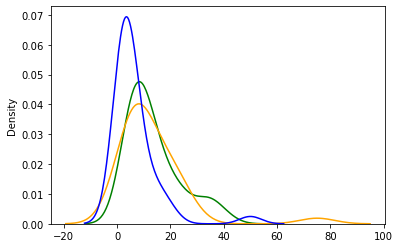

In [22]:
sns.kdeplot(households_collected_ndirande.hh_income/households_collected_ndirande.hhcount/1000, color = "green")
sns.kdeplot(households_collected_chileka.hh_income/households_collected_chileka.hhcount/1000, color = "orange")
sns.kdeplot(households_collected_chikwawa.hh_income/households_collected_chikwawa.hhcount/1000, color = "blue")

In [23]:
print(pd.__version__)

1.2.0


In [24]:
individuals_collected_ndirande.ip_sex.to_numpy()

array(['Male ', 'Male ', 'Male ', 'Female', 'Male ', 'Female', 'Male ',
       'Female', 'Female', 'Male ', 'Female', 'Male ', 'Female', 'Female',
       'Male ', 'Female', 'Female', 'Female', 'Female', 'Male ', 'Male ',
       'Female', 'Female', 'Male ', 'Male ', 'Female', 'Female', 'Female',
       'Female', 'Male ', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male ', 'Female', 'Male ', 'Male ', 'Female', 'Female',
       'Male ', 'Male ', 'Female', 'Female', 'Female', 'Female', 'Male ',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male ',
       'Female', 'Female', 'Male ', 'Male ', 'Female', 'Male ', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male ', 'Male ', 'Female',
       'Female', 'Female', 'Male ', 'Male ', 'Male ', 'Female', 'Female',
       'Female', 'Male ', 'Female', 'Female', 'Male ', 'Female', 'Female',
       'Male ', 'Female', 'Female', 'Female', 'Male ', 'Female', 'Male ',
       'Female', 'Female', 'Male ', 'Female'], dtype

(array([34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 59.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

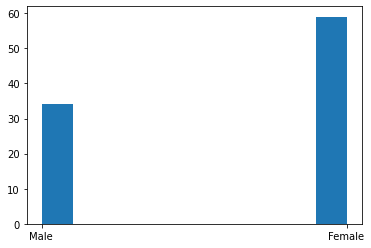

In [25]:
plt.hist(individuals_collected_ndirande.ip_sex)

In [26]:
def synthetic_individual_feature(individuals, household_id, feature_name, mixture_coefficient, poisson_param):
    
    if feature_name=="age":
        bootstrap_age_population = individuals.age
        bootstrap_age_household  = individuals.loc[individuals.hhid==household_id].age
        
        coin = float(np.random.uniform(0, 1, 1)<mixture_coefficient)
        age  = coin*np.random.choice(bootstrap_age_population) + (1-coin)*np.random.choice(bootstrap_age_household)
        age  = np.max([0, age + np.random.choice([-1, 1])*np.random.poisson(poisson_param)])
        
        return age
        
    elif feature_name=="sex":
        bootstrap_sex_population = individuals.ip_sex
        bootstrap_sex_household  = individuals.loc[individuals.hhid==household_id].ip_sex
        
        if np.random.uniform(0, 1, 1)<mixture_coefficient:
            
            return np.random.choice(bootstrap_sex_population)
            
        else:
            
            return np.random.choice(bootstrap_sex_household)
        
    else:
        print("No feature")
        return np.nan

In [27]:
individual_number_max = max(individuals_collected_chikwawa.individual_number)

mixture_coefficient = 0.75
poisson_param = 3

for household_id in households_collected_chikwawa.hhid:
    
    household_row = households_collected_chikwawa[households_collected_chikwawa.hhid==household_id]
    n_tosimulate = (household_row.hhcount-household_row.household_sample_size).to_numpy()
    
    while n_tosimulate>0:
        individual_number_new = individual_number_max+1
        individual_number_max = individual_number_max+1
        
        n_tosimulate = n_tosimulate-1
        
        individual_hhid_new = household_id
        
        individual_age_new  = synthetic_individual_feature(individuals_collected_chikwawa, household_id, "age", mixture_coefficient, poisson_param)
        
        individual_sex_new  = synthetic_individual_feature(individuals_collected_chikwawa, household_id, "sex", mixture_coefficient, poisson_param)
        
        household_sample_size_new = households_collected_chikwawa.loc[households_collected_chikwawa.hhid==household_id, "household_sample_size"]+1
        households_collected_chikwawa.loc[households_collected_chikwawa.hhid==household_id, "household_sample_size"] = household_sample_size_new
        
        individual_row = pd.DataFrame([[individual_number_new, individual_hhid_new, individual_age_new, individual_sex_new, ]], columns=individuals_collected_chikwawa.columns)
        
        individuals_collected_chikwawa = individuals_collected_chikwawa.append(individual_row) 
        
        

In [28]:
individual_number_max = max(individuals_collected_chileka.individual_number)

mixture_coefficient = 0.75
poisson_param = 3

for household_id in households_collected_chileka.hhid:
    
    household_row = households_collected_chileka[households_collected_chileka.hhid==household_id]
    n_tosimulate = (household_row.hhcount-household_row.household_sample_size).to_numpy()
    
    while n_tosimulate>0:
        individual_number_new = individual_number_max+1
        individual_number_max = individual_number_max+1
        
        n_tosimulate = n_tosimulate-1
        
        individual_hhid_new = household_id
        
        individual_age_new  = synthetic_individual_feature(individuals_collected_chileka, household_id, "age", mixture_coefficient, poisson_param)
        
        individual_sex_new  = synthetic_individual_feature(individuals_collected_chileka, household_id, "sex", mixture_coefficient, poisson_param)
        
        household_sample_size_new = households_collected_chileka.loc[households_collected_chileka.hhid==household_id, "household_sample_size"]+1
        households_collected_chileka.loc[households_collected_chileka.hhid==household_id, "household_sample_size"] = household_sample_size_new
        
        individual_row = pd.DataFrame([[individual_number_new, individual_hhid_new, individual_age_new, individual_sex_new, ]], columns=individuals_collected_chileka.columns)
        
        individuals_collected_chileka = individuals_collected_chileka.append(individual_row) 
        
        

In [29]:
individual_number_max = max(individuals_collected_ndirande.individual_number)

mixture_coefficient = 0.75
poisson_param = 3

for household_id in households_collected_ndirande.hhid:
    
    household_row = households_collected_ndirande[households_collected_ndirande.hhid==household_id]
    n_tosimulate = (household_row.hhcount-household_row.household_sample_size).to_numpy()
    
    while n_tosimulate>0:
        individual_number_new = individual_number_max+1
        individual_number_max = individual_number_max+1
        
        n_tosimulate = n_tosimulate-1
        
        individual_hhid_new = household_id
        
        individual_age_new  = synthetic_individual_feature(individuals_collected_ndirande, household_id, "age", mixture_coefficient, poisson_param)
        
        individual_sex_new  = synthetic_individual_feature(individuals_collected_ndirande, household_id, "sex", mixture_coefficient, poisson_param)
        
        household_sample_size_new = households_collected_ndirande.loc[households_collected_ndirande.hhid==household_id, "household_sample_size"]+1
        households_collected_ndirande.loc[households_collected_ndirande.hhid==household_id, "household_sample_size"] = household_sample_size_new
        
        individual_row = pd.DataFrame([[individual_number_new, individual_hhid_new, individual_age_new, individual_sex_new, ]], columns=individuals_collected_ndirande.columns)
        
        individuals_collected_ndirande = individuals_collected_ndirande.append(individual_row) 
        
        

(array([43., 24., 17., 14., 19., 18., 15., 12.,  3.,  3.]),
 array([ 0. ,  6.8, 13.6, 20.4, 27.2, 34. , 40.8, 47.6, 54.4, 61.2, 68. ]),
 <BarContainer object of 10 artists>)

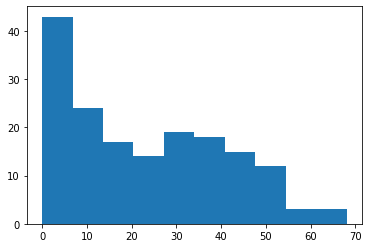

In [30]:
plt.hist(individuals_collected_chikwawa.age)

(array([ 67.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 101.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

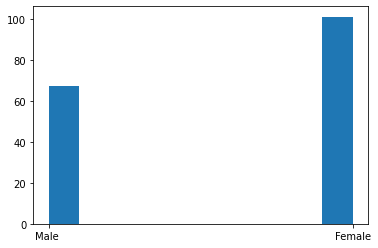

In [31]:
plt.hist(individuals_collected_chikwawa.ip_sex)

In [32]:
individuals_collected_chikwawa = individuals_collected_chikwawa.reset_index(drop=True)
individuals_collected_chikwawa

individuals_collected_chileka = individuals_collected_chileka.reset_index(drop=True)
individuals_collected_chileka

individuals_collected_ndirande = individuals_collected_ndirande.reset_index(drop=True)
individuals_collected_ndirande

,individual_number,hhid,age,ip_sex
0,0,HH001YN,13.0,Male
1,1,HH001YN,15.0,Male
2,2,HH001YN,39.0,Male
3,3,HH001YN,32.0,Female
4,4,HH002WN,68.0,Male
...,...,...,...,...
151,151,HH0580N,26.0,Female
152,152,HH059ZN,15.0,Male
153,153,HH059ZN,48.0,Male
154,154,HH0636N,17.0,Female


In [33]:
individuals_collected_chikwawa = individuals_collected_chikwawa.join(households_collected_chikwawa[["hhid", "house_number"]].set_index('hhid'), on = "hhid")

individuals_collected_chikwawa = individuals_collected_chikwawa.drop("hhid", axis = 1)
households_collected_chikwawa = households_collected_chikwawa.drop("hhid", axis = 1)


individuals_collected_chileka = individuals_collected_chileka.join(households_collected_chileka[["hhid", "house_number"]].set_index('hhid'), on = "hhid")

individuals_collected_chileka = individuals_collected_chileka.drop("hhid", axis = 1)
households_collected_chileka = households_collected_chileka.drop("hhid", axis = 1)


individuals_collected_ndirande = individuals_collected_ndirande.join(households_collected_ndirande[["hhid", "house_number"]].set_index('hhid'), on = "hhid")

individuals_collected_ndirande = individuals_collected_ndirande.drop("hhid", axis = 1)
households_collected_ndirande = households_collected_ndirande.drop("hhid", axis = 1)

In [34]:
individuals_collected_ndirande

,individual_number,age,ip_sex,house_number
0,0,13.0,Male,0
1,1,15.0,Male,0
2,2,39.0,Male,0
3,3,32.0,Female,0
4,4,68.0,Male,1
...,...,...,...,...
151,151,26.0,Female,32
152,152,15.0,Male,33
153,153,48.0,Male,33
154,154,17.0,Female,34


In [35]:
individuals_collected_chikwawa.to_csv('Data/Input/BeforeJoin/individuals_chikwawa.csv', index=False)
households_collected_chikwawa.to_csv( 'Data/Input/BeforeJoin/households_chikwawa.csv', index=False)

individuals_collected_chileka.to_csv('Data/Input/BeforeJoin/individuals_chileka.csv', index=False)
households_collected_chileka.to_csv( 'Data/Input/BeforeJoin/households_chileka.csv', index=False)

individuals_collected_ndirande.to_csv('Data/Input/BeforeJoin/individuals_ndirande.csv', index=False)
households_collected_ndirande.to_csv( 'Data/Input/BeforeJoin/households_ndirande.csv', index=False)

individuals_time_series.to_csv(         'Data/Input/BeforeJoin/individuals_time_series.csv',          index=False)
individuals_time_series_chileka.to_csv( 'Data/Input/BeforeJoin/individuals_time_series_chileka.csv',  index=False)
individuals_time_series_ndirande.to_csv('Data/Input/BeforeJoin/individuals_time_series_ndirande.csv', index=False)

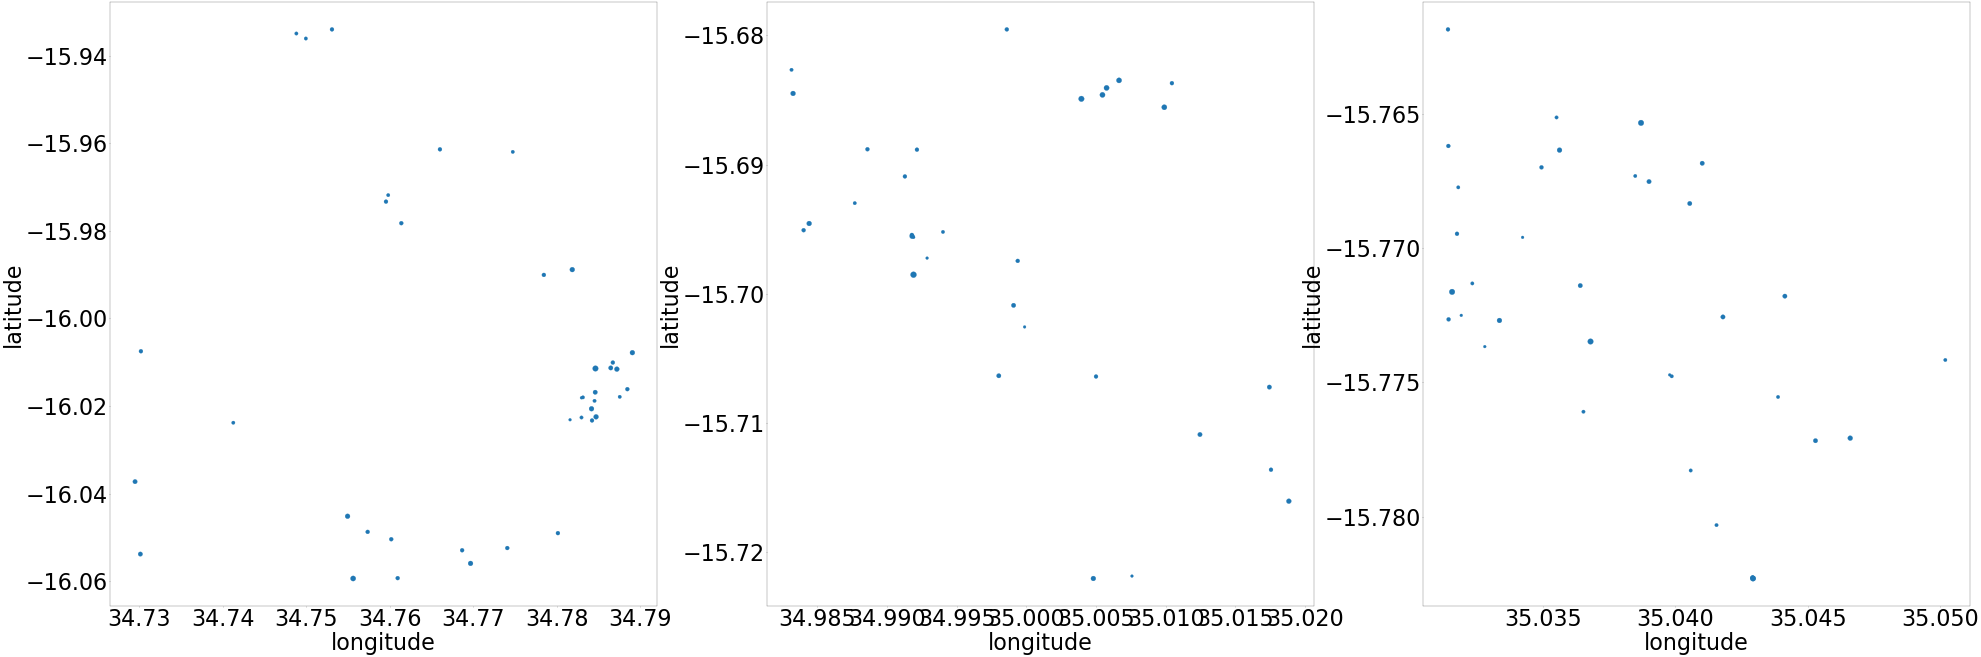

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(120, 40), dpi=20)


ax1.set_xlabel('longitude', fontsize=80)
ax1.set_ylabel('latitude', fontsize=80)

ax1.yaxis.set_tick_params(labelsize=80)
ax1.xaxis.set_tick_params(labelsize=80)

ax1.scatter(households_collected_chikwawa.longitude, households_collected_chikwawa.latitude, s = 50*households_collected_chikwawa.hhcount)


ax2.set_xlabel('longitude', fontsize=80)
ax2.set_ylabel('latitude', fontsize=80)

ax2.yaxis.set_tick_params(labelsize=80)
ax2.xaxis.set_tick_params(labelsize=80)

ax2.scatter(households_collected_chileka.longitude, households_collected_chileka.latitude, s = 50*households_collected_chileka.hhcount)


ax3.set_xlabel('longitude', fontsize=80)
ax3.set_ylabel('latitude', fontsize=80)

ax3.yaxis.set_tick_params(labelsize=80)
ax3.xaxis.set_tick_params(labelsize=80)

ax3.scatter(households_collected_ndirande.longitude, households_collected_ndirande.latitude, s = 50*households_collected_ndirande.hhcount)


# Sythetic population

## Individuals

In [37]:
df_chikwawa_individuals = pd.read_csv (r'Data/Input/Synthetic/synthetic_chikwawa_people.csv')
df_ndirande_individuals = pd.read_csv (r'Data/Input/Synthetic/synthetic_ndirande_people.csv')
df_chileka_individuals = pd.read_csv (r'Data/Input/Synthetic/synthetic_chileka_people.csv')

# df_chikwawa_individuals = pd.read_csv (r'synthetic_chikwawa_people.csv')
# df_ndirande_individuals = pd.read_csv (r'synthetic_ndirande_people.csv')
# df_chileka_individuals = pd.read_csv (r'synthetic_chileka_people.csv')

In [38]:
df_ndirande_individuals

,Unnamed: 0,hhid,age,ip_sex,ip_relationhhh,ip_tribe,ip_religion2,ip_schyn,ip_jobstatus,ip_travelfamily,ip_hivstatus,ip_hivsrc,ip_hsbill,ip_hsbdiar,ip_hsbfever,ip_hsbcough,ip_hsbsevereill,geometry,new_hhid,scores
0,0,HH023MN,24,Female,Spouse / partner,Sena,Other (specify),No,Paid employee,Yearly,Non reactive,Particiant,Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3900805.842833428 -1779068.519308078),0,NaN
1,1,HH023MN,3,Male,Son,Sena,Other (specify),Yes,Student,Yearly,Unknown,Other (specify),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3900805.842833428 -1779068.519308078),0,NaN
2,2,HH023MN,27,Male,Spouse / partner,Ngoni,Pentecostal,No,Paid employee,Never,Non reactive,Other (specify),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3900805.842833428 -1779068.519308078),0,NaN
3,3,HH0628N,78,Female,Spouse / partner,Chewa,CCAP,No,Unemployed,Yearly,Unknown,Particiant,Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3900101.617923551 -1777077.682176183),3,NaN
4,4,HH0628N,10,Female,Grandfather,Chewa,CCAP,Yes,Student,Yearly,Unknown,Other (specify),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3900101.617923551 -1777077.682176183),3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25307,25307,HH0804N,26,Female,Spouse / partner,Lomwe,Catholic,No,Unemployed,Yearly,Non reactive,Record card,Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3899991.950414001 -1777076.505829227),5522,NaN
25308,25308,HH0804N,10,Male,Son,Lomwe,Catholic,Yes,Student,Yearly,Unknown,Particiant,Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3899991.950414001 -1777076.505829227),5522,NaN
25309,25309,HH0804N,1,Male,Son,Lomwe,Catholic,No,Unemployed,Yearly,Unknown,Particiant,Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3899991.950414001 -1777076.505829227),5522,NaN
25310,25310,HH099JN,31,Female,Spouse / partner,Ngoni,Pentecostal,No,Unemployed,Never,Unknown,Particiant,Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),Health centre (gov),POINT (3899991.950414001 -1777076.505829227),5522,25.0


chikwawa

In [39]:
individuals_chikwawa = df_chikwawa_individuals[["new_hhid", "age", "ip_sex"]].reset_index(drop=True).reset_index()
individuals_chikwawa =individuals_chikwawa.rename(columns = {"index": "individual_number", "new_hhid": "hhid"})

individuals_chikwawa.individual_number = individuals_chikwawa.individual_number.astype(int)
individuals_chikwawa.hhid              = individuals_chikwawa.hhid.astype(int)
individuals_chikwawa['household_sample_size'] = individuals_chikwawa.groupby('hhid')['hhid'].transform('size')

In [40]:
individuals_chikwawa

,individual_number,hhid,age,ip_sex,household_sample_size
0,0,1,52,Female,4
1,1,1,16,Male,4
2,2,1,25,Male,4
3,3,1,18,Female,4
4,4,5,52,Female,4
...,...,...,...,...,...
9505,9505,2375,48,Female,6
9506,9506,2375,2,Male,6
9507,9507,2375,13,Female,6
9508,9508,2375,13,Male,6


ndirande

In [41]:
individuals_ndirande = df_ndirande_individuals[["new_hhid", "age", "ip_sex"]].reset_index(drop=True).reset_index()
individuals_ndirande =individuals_ndirande.rename(columns = {"index": "individual_number", "new_hhid": "hhid"})

individuals_ndirande.individual_number = individuals_ndirande.individual_number.astype(int)
individuals_ndirande.hhid              = individuals_ndirande.hhid.astype(int)
individuals_ndirande['household_sample_size'] = individuals_ndirande.groupby('hhid')['hhid'].transform('size')

In [42]:
individuals_ndirande

,individual_number,hhid,age,ip_sex,household_sample_size
0,0,0,24,Female,3
1,1,0,3,Male,3
2,2,0,27,Male,3
3,3,3,78,Female,3
4,4,3,10,Female,3
...,...,...,...,...,...
25307,25307,5522,26,Female,6
25308,25308,5522,10,Male,6
25309,25309,5522,1,Male,6
25310,25310,5522,31,Female,6


chileka

In [43]:
individuals_chileka = df_chileka_individuals[["new_hhid", "age", "ip_sex"]].reset_index(drop=True).reset_index()
individuals_chileka =individuals_chileka.rename(columns = {"index": "individual_number", "new_hhid": "hhid"})

individuals_chileka.individual_number = individuals_chileka.individual_number.astype(int)
individuals_chileka.hhid              = individuals_chileka.hhid.astype(int)
individuals_chileka['household_sample_size'] = individuals_chileka.groupby('hhid')['hhid'].transform('size')

## Households

In [44]:
df_chikwawa = pd.read_csv (r'Data/Input/Synthetic/synthetic_chikwawa_households.csv')
df_ndirande = pd.read_csv (r'Data/Input/Synthetic/synthetic_ndirande_households.csv')
df_chileka = pd.read_csv (r'Data/Input/Synthetic/synthetic_chileka_households.csv')


# df_chikwawa = pd.read_csv (r'synthetic_chikwawa_households.csv')
# df_ndirande = pd.read_csv (r'synthetic_ndirande_households.csv')
# df_chileka = pd.read_csv (r'synthetic_chileka_households.csv')

<AxesSubplot:xlabel='hh_income', ylabel='Density'>

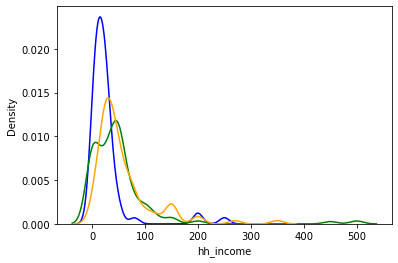

In [45]:
sns.kdeplot(df_chikwawa.hh_income/1000, color = "blue")
sns.kdeplot(df_ndirande.hh_income/1000, color = "green")
sns.kdeplot(df_chileka.hh_income/1000, color = "orange")

In [46]:
df_ndirande.hh_income

0       100000
1        55000
2          100
3        15000
4        50000
         ...  
5518     60000
5519     50000
5520        30
5521     50000
5522       100
Name: hh_income, Length: 5523, dtype: int64

In [47]:
np.mean(df_chileka["hh_income"]/df_chileka["hhcount"])

14854.846132897605

In [48]:
np.mean(df_ndirande["hh_income"]/df_ndirande["hhcount"])

11885.889405542855

In [49]:
import pyproj

wgs84 = pyproj.Proj(projparams = 'epsg:4326')
InputGrid = pyproj.Proj(projparams = 'epsg:3857')

epsg_x_chikwawa = []
epsg_y_chikwawa = []

epsg_x_ndirande = []
epsg_y_ndirande = []


epsg_x_chileka = []
epsg_y_chileka = []


for point in df_chikwawa.geometry:
    
    space_loc = 7
    while point[space_loc]!=" ":
        space_loc = space_loc+1
    
    x1 = float(point[7:space_loc])
    y1 = float(point[space_loc+1:-1])
    
    epsg_x_chikwawa.append(x1)
    epsg_y_chikwawa.append(y1)
    
for point in df_ndirande.geometry:
    
    space_loc = 7
    while point[space_loc]!=" ":
        space_loc = space_loc+1
    
    x1 = float(point[7:space_loc])
    y1 = float(point[space_loc+1:-1])
    
    epsg_x_ndirande.append(x1)
    epsg_y_ndirande.append(y1)
    
for point in df_chileka.geometry:
    
    space_loc = 7
    while point[space_loc]!=" ":
        space_loc = space_loc+1
    
    x1 = float(point[7:space_loc])
    y1 = float(point[space_loc+1:-1])
    
    epsg_x_chileka.append(x1)
    epsg_y_chileka.append(y1)

In [50]:
transformer = pyproj.Transformer.from_crs("epsg:3857", "epsg:4326")

latitude_chikwawa, longitude_chikwawa = transformer.transform(epsg_x_chikwawa, epsg_y_chikwawa)

latitude_ndirande, longitude_ndirande = transformer.transform(epsg_x_ndirande, epsg_y_ndirande)

latitude_chileka,  longitude_chileka  = transformer.transform(epsg_x_chileka, epsg_y_chileka)

In [51]:
df_long_lat_chikwawa = pd.DataFrame(dict(longitude = longitude_chikwawa, latitude = latitude_chikwawa))
df_long_lat_ndirande = pd.DataFrame(dict(longitude = longitude_ndirande, latitude = latitude_ndirande))
df_long_lat_chileka  = pd.DataFrame(dict(longitude = longitude_chileka,  latitude = latitude_chileka))

In [52]:
df_chikwawa["longitude"] = df_long_lat_chikwawa.longitude
df_chikwawa["latitude"] = df_long_lat_chikwawa.latitude

df_ndirande["longitude"] = df_long_lat_ndirande.longitude
df_ndirande["latitude"] = df_long_lat_ndirande.latitude

df_chileka["longitude"]  = df_long_lat_chileka.longitude
df_chileka["latitude"]  = df_long_lat_chileka.latitude

chikwawa

In [53]:
households_chikwawa   = df_chikwawa[["new_hhid", "hhcount", "hh_income", "latitude", "longitude"]].drop_duplicates().reset_index(drop=True).reset_index()
households_chikwawa   = households_chikwawa.rename(columns = {"index": "house_number", "new_hhid": "hhid"})

households_chikwawa.house_number = households_chikwawa.house_number.astype(int)
households_chikwawa.hhid         = households_chikwawa.hhid.astype(int)

n_households = households_chikwawa.shape[0]
new_household_count = individuals_chikwawa[["hhid", "household_sample_size"]].drop_duplicates().reset_index(drop=True)
households_chikwawa = households_chikwawa.join(new_household_count.set_index('hhid'), on = "hhid")
households_chikwawa["hhcount"] = households_chikwawa[["hhcount", "household_sample_size"]].max(axis=1)

individuals_chikwawa = individuals_chikwawa.drop("household_sample_size", axis = 1)

households_chikwawa = households_chikwawa.drop("hhid", axis = 1)

ndirande

In [54]:
households_ndirande   = df_ndirande[["new_hhid", "hhcount", "hh_income", "latitude", "longitude"]].drop_duplicates().reset_index(drop=True).reset_index()
households_ndirande   = households_ndirande.rename(columns = {"index": "house_number", "new_hhid": "hhid"})

households_ndirande.house_number = households_ndirande.house_number.astype(int)
households_ndirande.hhid         = households_ndirande.hhid.astype(int)

n_households = households_ndirande.shape[0]
new_household_count = individuals_ndirande[["hhid", "household_sample_size"]].drop_duplicates().reset_index(drop=True)
households_ndirande = households_ndirande.join(new_household_count.set_index('hhid'), on = "hhid")
households_ndirande["hhcount"] = households_ndirande[["hhcount", "household_sample_size"]].max(axis=1)

individuals_ndirande = individuals_ndirande.drop("household_sample_size", axis = 1)

households_ndirande = households_ndirande.drop("hhid", axis = 1)

chileka

In [55]:
households_chileka   = df_chileka[["new_hhid", "hhcount", "hh_income", "latitude", "longitude"]].drop_duplicates().reset_index(drop=True).reset_index()
households_chileka   = households_chileka.rename(columns = {"index": "house_number", "new_hhid": "hhid"})

households_chileka.house_number = households_chileka.house_number.astype(int)
households_chileka.hhid         = households_chileka.hhid.astype(int)

n_households = households_chileka.shape[0]
new_household_count = individuals_chileka[["hhid", "household_sample_size"]].drop_duplicates().reset_index(drop=True)
households_chileka = households_chileka.join(new_household_count.set_index('hhid'), on = "hhid")
households_chileka["hhcount"] = households_chileka[["hhcount", "household_sample_size"]].max(axis=1)

individuals_chileka = individuals_chileka.drop("household_sample_size", axis = 1)

households_chileka = households_chileka.drop("hhid", axis = 1)

# Join data

## Households

In [56]:
max_house_number = max(households_collected_chikwawa.house_number)

households_chikwawa.house_number  = households_chikwawa.house_number  + max_house_number +1
individuals_chikwawa.hhid = individuals_chikwawa.hhid + max_house_number +1

households_chikwawa = pd.concat([households_collected_chikwawa, households_chikwawa]).reset_index(drop=True)

max_house_number = max(households_collected_ndirande.house_number)

households_ndirande.house_number  = households_ndirande.house_number  + max_house_number +1
individuals_ndirande.hhid = individuals_ndirande.hhid + max_house_number +1

households_ndirande = pd.concat([households_collected_ndirande, households_ndirande]).reset_index(drop=True)

max_house_number = max(households_collected_chileka.house_number)

households_chileka.house_number  = households_chileka.house_number  + max_house_number +1
individuals_chileka.hhid = individuals_chileka.hhid + max_house_number +1

households_chileka = pd.concat([households_collected_chileka, households_chileka]).reset_index(drop=True)

In [57]:
households_ndirande

,house_number,hhcount,hh_income,latitude,longitude,household_sample_size
0,0,5,50000,-15.782285,35.042917,5
1,1,5,30000,-15.772561,35.041798,5
2,2,6,40000,-15.772692,35.033365,6
3,3,8,50000,-15.771627,35.031578,8
4,4,4,50000,-15.766988,35.034952,4
...,...,...,...,...,...,...
5554,5554,5,60000,-15.778676,35.041541,5
5555,5555,2,50000,-15.770196,35.043165,2
5556,5556,4,30,-15.761317,35.032629,4
5557,5557,3,50000,-15.765317,35.036834,3


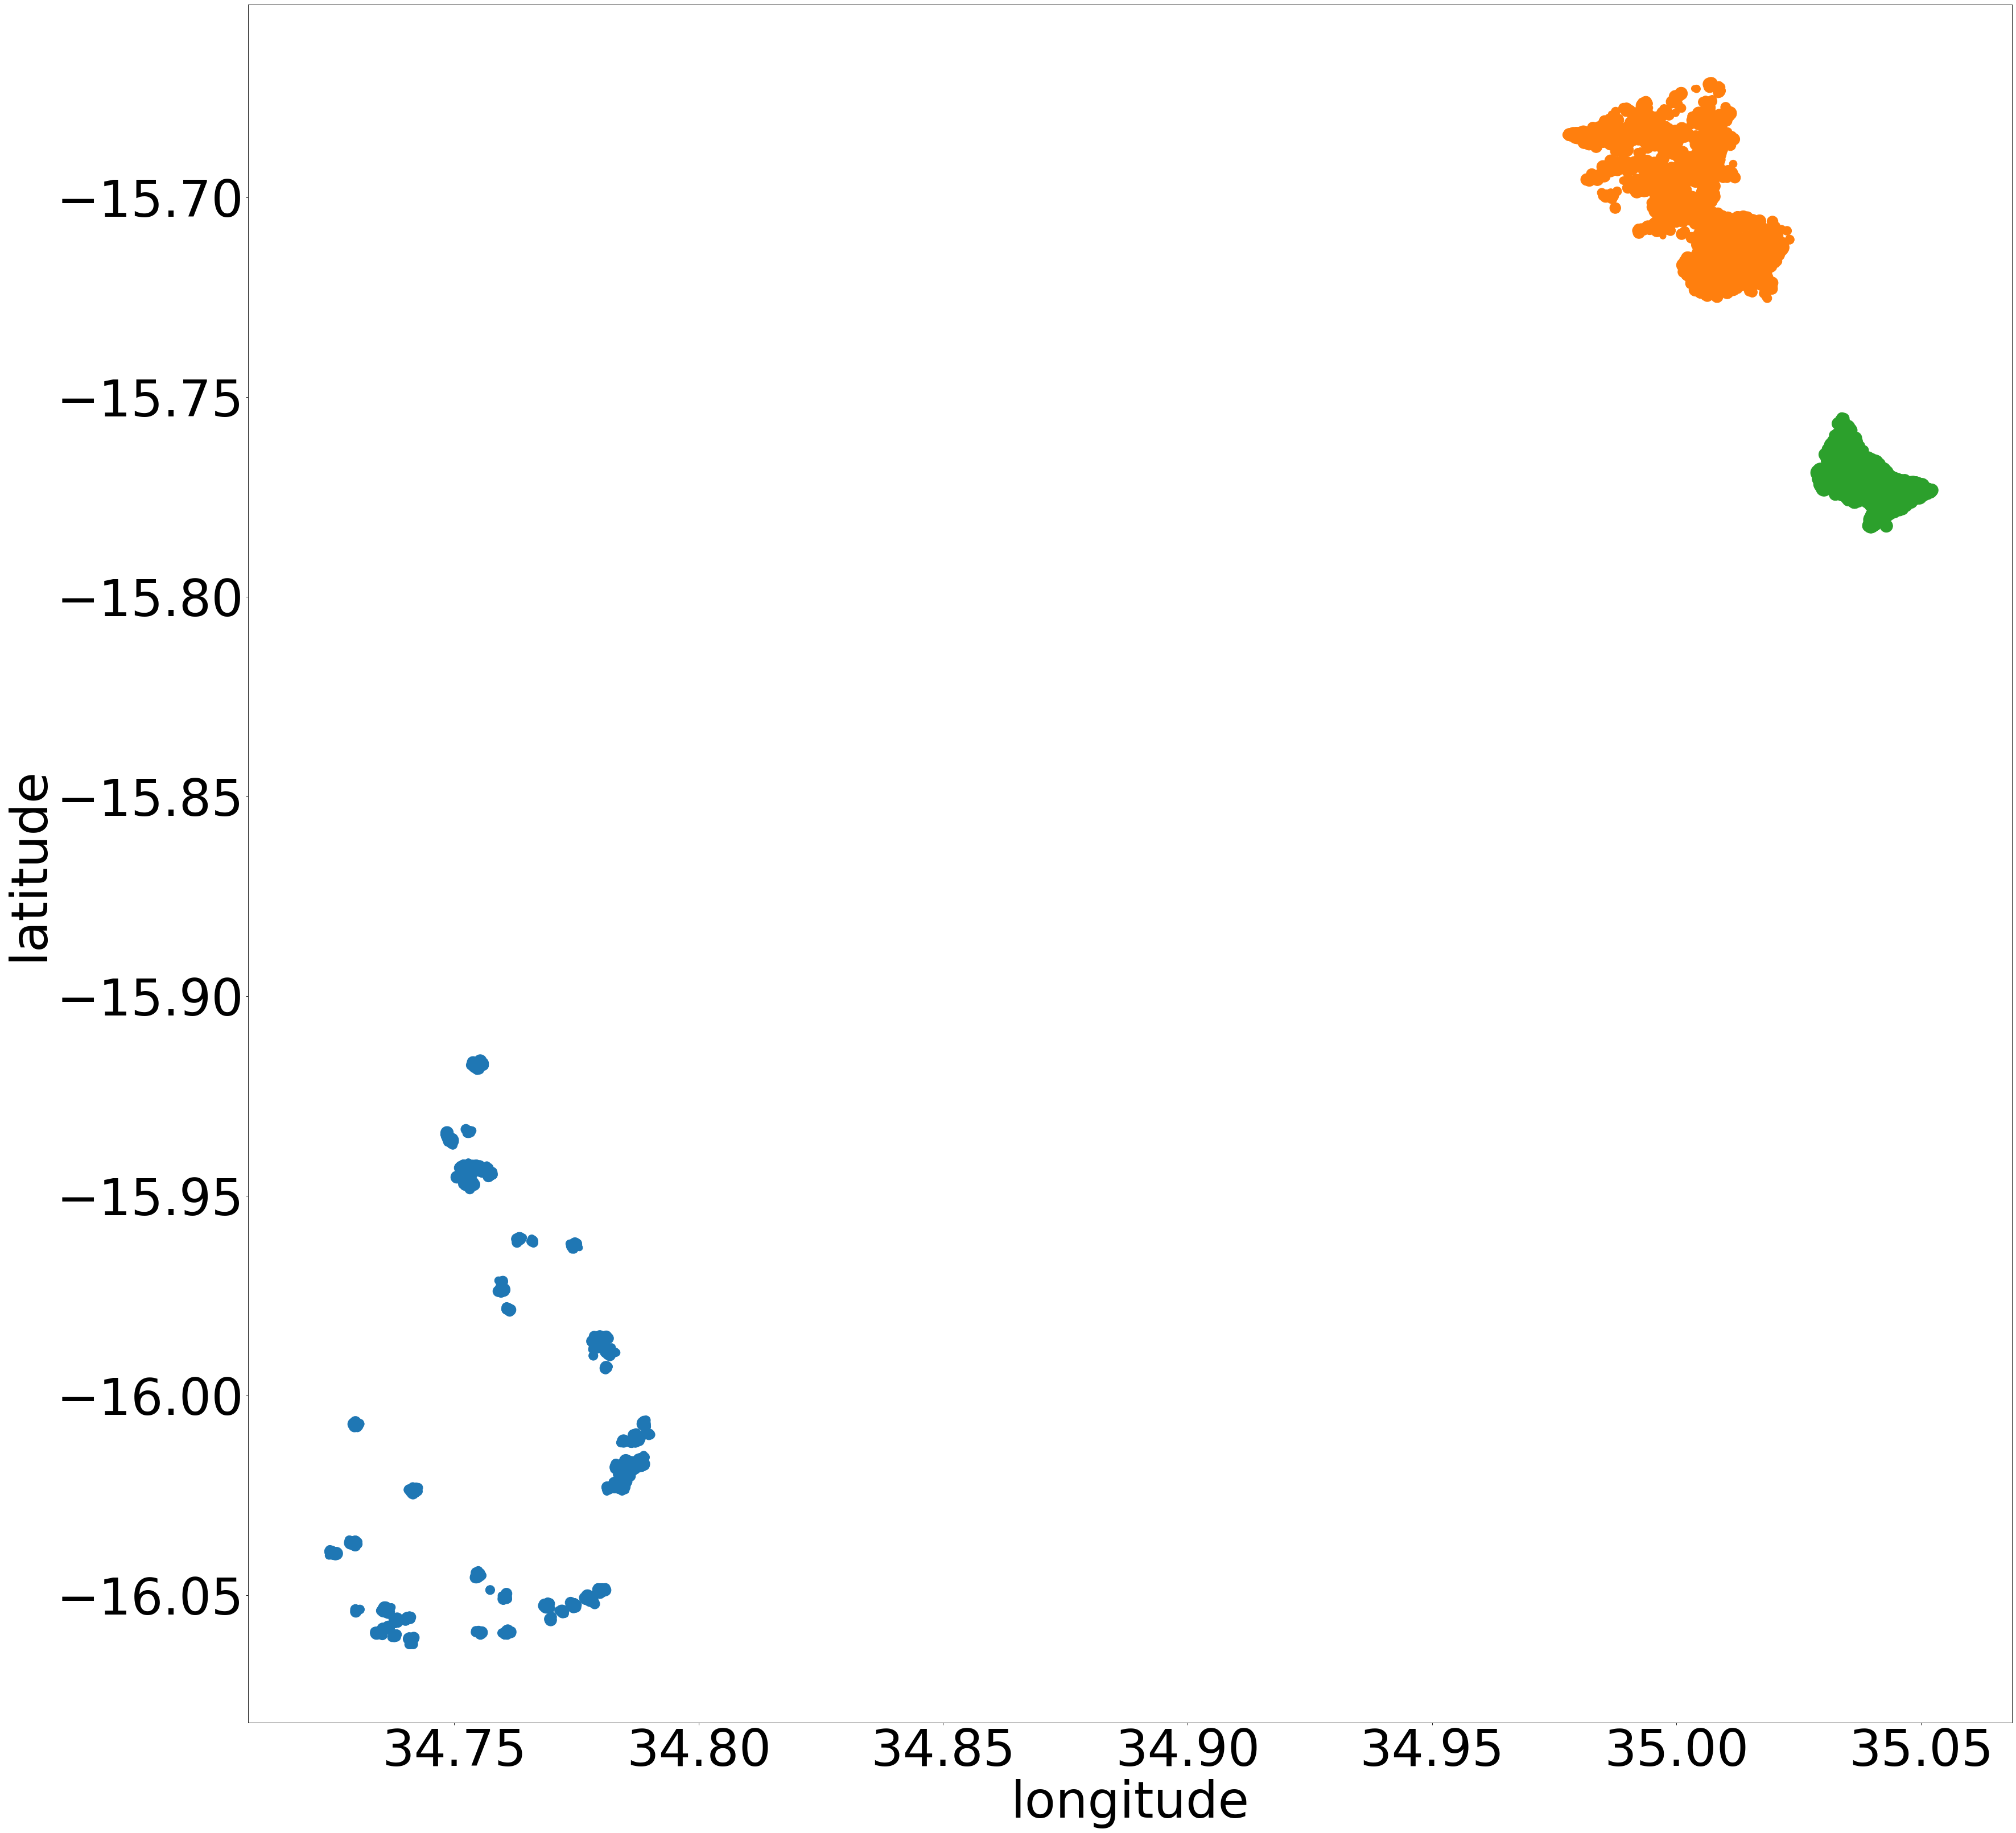

In [58]:
fig, (ax) = plt.subplots(1, 1, figsize=(50, 50), dpi=80)


ax.set_xlabel('longitude', fontsize=80)
ax.set_ylabel('latitude', fontsize=80)

ax.yaxis.set_tick_params(labelsize=80)
ax.xaxis.set_tick_params(labelsize=80)

# ax.set_xlim((H.min_max_longitude[0], H.min_max_longitude[1]))
# ax.set_ylim((H.min_max_latitude[0],  H.min_max_latitude[1]))

ax.scatter(households_chikwawa.longitude, households_chikwawa.latitude, s = 50*households_chikwawa.hhcount)
ax.scatter(households_chileka.longitude, households_chileka.latitude, s = 50*households_chileka.hhcount)
ax.scatter(households_ndirande.longitude, households_ndirande.latitude, s = 50*households_ndirande.hhcount)
# ax.scatter(H.longitude_centroids, H.latitude_centroids, color = "red", s =200)

In [59]:
df_long_lat_chikwawa = pd.DataFrame(dict(longitude = households_chikwawa.longitude, latitude = households_chikwawa.latitude))
df_long_lat_ndirande = pd.DataFrame(dict(longitude = households_ndirande.longitude, latitude = households_ndirande.latitude))
df_long_lat_chileka  = pd.DataFrame(dict(longitude = households_chileka.longitude,  latitude = households_chileka.latitude))

In [60]:
import geopandas as gp

geo_chikwawa = gp.GeoDataFrame(df_long_lat_chikwawa, geometry = gp.points_from_xy(df_long_lat_chikwawa.longitude, df_long_lat_chikwawa.latitude, crs = "EPSG:4326") )
geo_ndirande = gp.GeoDataFrame(df_long_lat_ndirande, geometry = gp.points_from_xy(df_long_lat_ndirande.longitude, df_long_lat_ndirande.latitude, crs = "EPSG:4326") )
geo_chileka  = gp.GeoDataFrame(df_long_lat_chileka , geometry = gp.points_from_xy(df_long_lat_chileka.longitude,  df_long_lat_chileka.latitude, crs = "EPSG:4326") )

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

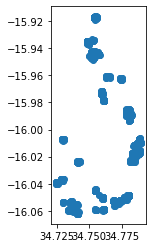

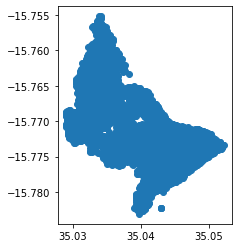

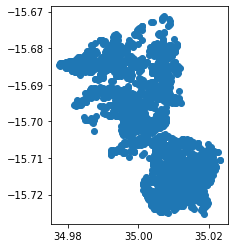

In [61]:
geo_chikwawa.plot(), geo_ndirande.plot(), geo_chileka.plot()

In [62]:
geo2_chikwawa = geo_chikwawa.to_crs(epsg = 20936)
geo2_ndirande = geo_ndirande.to_crs(epsg = 20936)
geo2_chileka  = geo_chileka.to_crs(epsg = 20936)

In [63]:
households_chikwawa["longitude"] = geo2_chikwawa.geometry.x
households_chikwawa["latitude"] = geo2_chikwawa.geometry.y

households_ndirande["longitude"] = geo2_ndirande.geometry.x
households_ndirande["latitude"] = geo2_ndirande.geometry.y

households_chileka["longitude"]  = geo2_chileka.geometry.x
households_chileka["latitude"]  = geo2_chileka.geometry.y

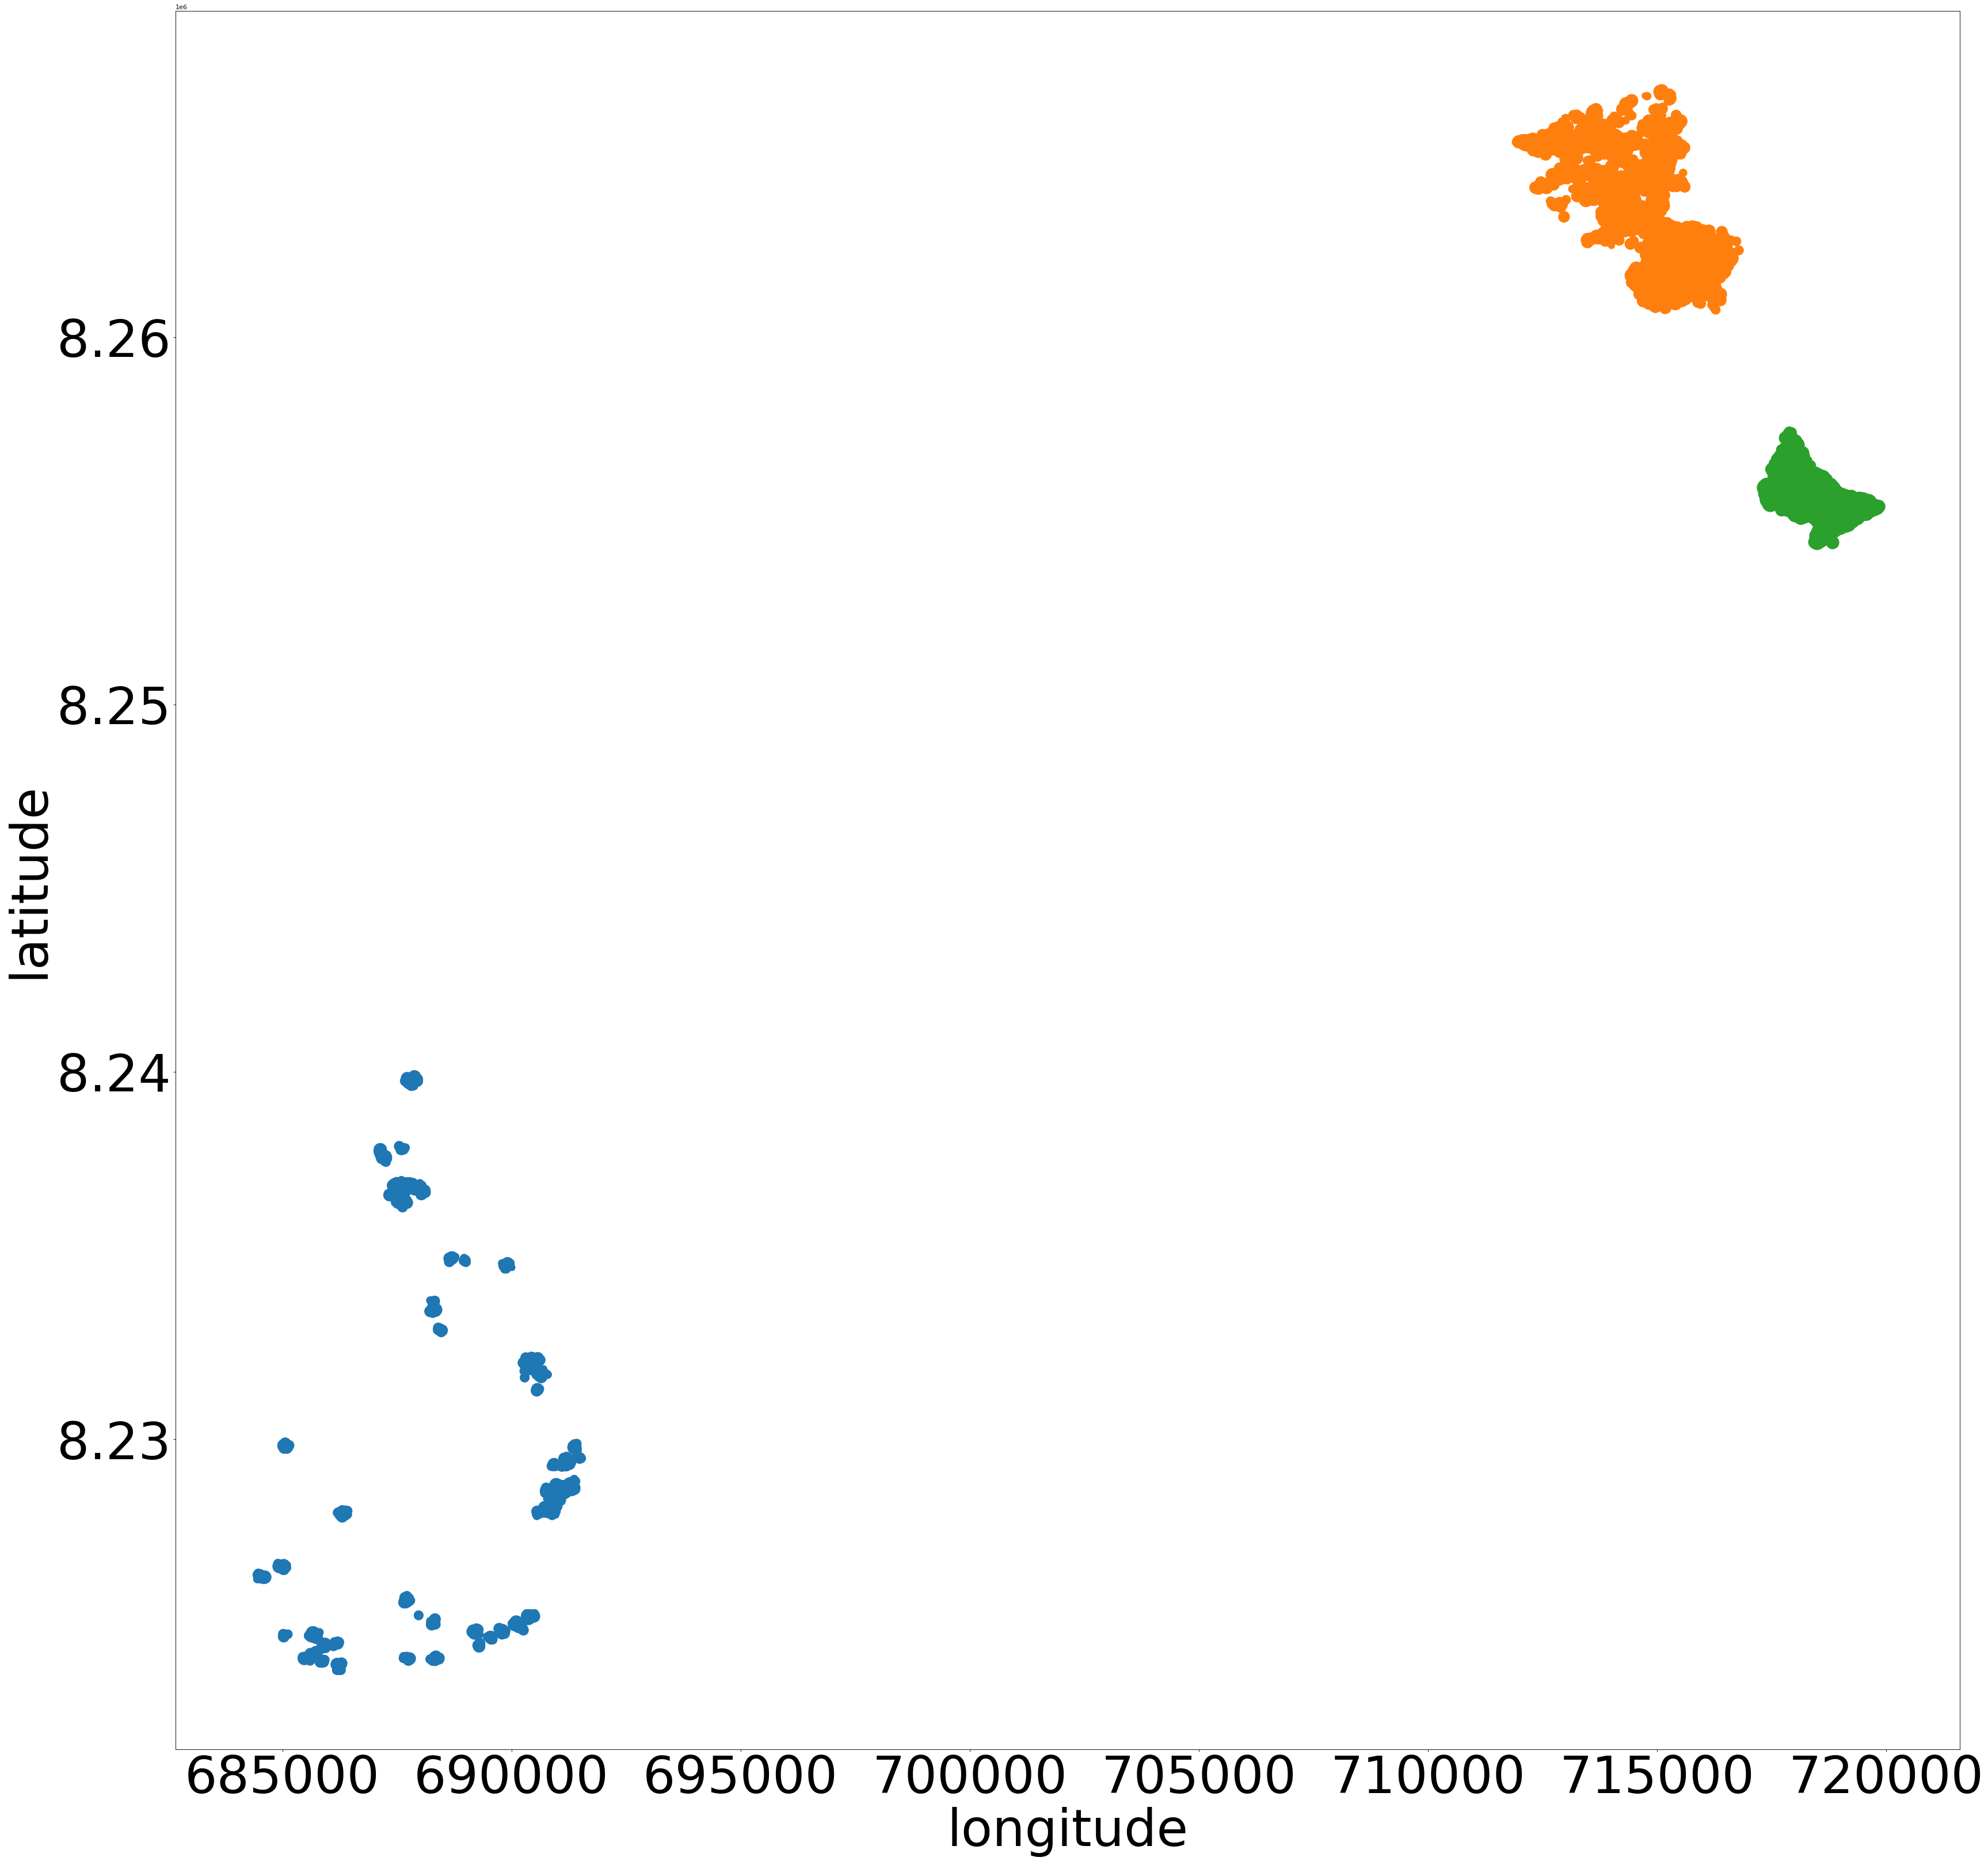

In [64]:
fig, (ax) = plt.subplots(1, 1, figsize=(50, 50), dpi=80)


ax.set_xlabel('longitude', fontsize=80)
ax.set_ylabel('latitude', fontsize=80)

ax.yaxis.set_tick_params(labelsize=80)
ax.xaxis.set_tick_params(labelsize=80)

# ax.set_xlim((H.min_max_longitude[0], H.min_max_longitude[1]))
# ax.set_ylim((H.min_max_latitude[0],  H.min_max_latitude[1]))

ax.scatter(households_chikwawa.longitude, households_chikwawa.latitude, s = 50*households_chikwawa.hhcount)
ax.scatter(households_chileka.longitude, households_chileka.latitude, s = 50*households_chileka.hhcount)
ax.scatter(households_ndirande.longitude, households_ndirande.latitude, s = 50*households_ndirande.hhcount)
# ax.scatter(H.longitude_centroids, H.latitude_centroids, color = "red", s =200)

## Individuals

In [65]:
individuals_collected_chikwawa = individuals_collected_chikwawa[["individual_number", "house_number", "age", "ip_sex"]].drop_duplicates().reset_index(drop=True)

individuals_collected_chileka  = individuals_collected_chileka[["individual_number", "house_number", "age", "ip_sex"]].drop_duplicates().reset_index(drop=True)

individuals_collected_ndirande = individuals_collected_ndirande[["individual_number", "house_number", "age", "ip_sex"]].drop_duplicates().reset_index(drop=True)

In [66]:
individuals_chikwawa

,individual_number,hhid,age,ip_sex
0,0,40,52,Female
1,1,40,16,Male
2,2,40,25,Male
3,3,40,18,Female
4,4,44,52,Female
...,...,...,...,...
9505,9505,2414,48,Female
9506,9506,2414,2,Male
9507,9507,2414,13,Female
9508,9508,2414,13,Male


chikwawa

In [67]:
individuals_chikwawa = individuals_chikwawa.rename(columns = {"hhid": "house_number"})

In [68]:
max_individual_number = max(individuals_collected_chikwawa.individual_number)

individuals_chikwawa.individual_number = individuals_chikwawa.individual_number + max_individual_number +1
individuals_chikwawa = pd.concat([individuals_collected_chikwawa, individuals_chikwawa]).reset_index(drop=True)

ndirande

In [69]:
individuals_ndirande = individuals_ndirande.rename(columns = {"hhid": "house_number"})

In [70]:
max_individual_number = max(individuals_collected_ndirande.individual_number)

individuals_ndirande.individual_number = individuals_ndirande.individual_number + max_individual_number +1
individuals_ndirande = pd.concat([individuals_collected_ndirande, individuals_ndirande]).reset_index(drop=True)

chileka

In [71]:
individuals_chileka = individuals_chileka.rename(columns = {"hhid": "house_number"})

In [72]:
max_individual_number = max(individuals_collected_chileka.individual_number)

individuals_chileka.individual_number = individuals_chileka.individual_number + max_individual_number +1
individuals_chileka = pd.concat([individuals_collected_chileka, individuals_chileka]).reset_index(drop=True)

(array([4213., 2472., 2166., 1828., 1180.,  794.,  486.,   39.,   95.,
          64.]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. ]),
 <BarContainer object of 10 artists>)

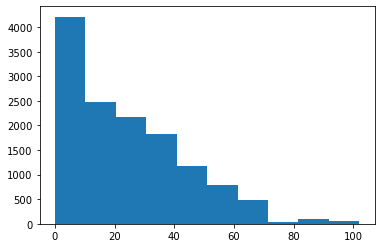

In [73]:
plt.hist(individuals_chileka.age)

(array([7839.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5498.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

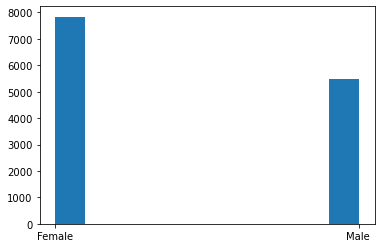

In [74]:
plt.hist(individuals_chileka.ip_sex)

# Build the time serie to be used

In [75]:
individuals_time_series

,t,pid,kpneu,ecoli
0,0,PT0004IN,0,1
1,21,PT0002MN,0,0
2,190,PT0004IN,0,1
3,91,PT0002MN,0,0
4,38,PT0005GN,1,0
...,...,...,...,...
1231,322,PT45713K,0,1
1232,455,PT45721K,0,1
1233,485,PT45721K,0,1
1234,506,PT45721K,0,1


In [76]:
min_t = min(individuals_time_series.t)
max_t = max(individuals_time_series.t)+1

N_I_detected_chikwawa = max(individuals_time_series_chikwawa.individual_number)+1
N_I_detected_chileka = max(individuals_time_series_chileka.individual_number)+1
N_I_detected_ndirande = max(individuals_time_series_ndirande.individual_number)+1

In [77]:
Y_ecoli_chikwawa = np.zeros((N_I_detected_chikwawa, max_t))
Y_kpneu_chikwawa = np.zeros((N_I_detected_chikwawa, max_t))

for index, row in individuals_time_series_chikwawa.iterrows():
    
    Y_ecoli_chikwawa[row.individual_number, row.t] = row.ecoli 
    Y_kpneu_chikwawa[row.individual_number, row.t] = row.kpneu 
    
    
Y_ecoli_chileka = np.zeros((N_I_detected_chileka, max_t))
Y_kpneu_chileka = np.zeros((N_I_detected_chileka, max_t))

for index, row in individuals_time_series_chileka.iterrows():
    
    Y_ecoli_chileka[row.individual_number, row.t] = row.ecoli 
    Y_kpneu_chileka[row.individual_number, row.t] = row.kpneu 
    
    
Y_ecoli_ndirande = np.zeros((N_I_detected_ndirande, max_t))
Y_kpneu_ndirande = np.zeros((N_I_detected_ndirande, max_t))

for index, row in individuals_time_series_ndirande.iterrows():
    
    Y_ecoli_ndirande[row.individual_number, row.t] = row.ecoli 
    Y_kpneu_ndirande[row.individual_number, row.t] = row.kpneu 


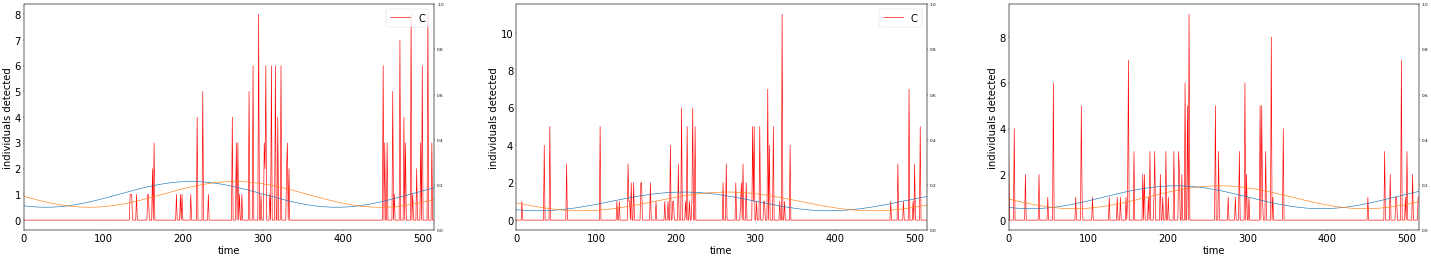

In [78]:
T= max_t

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(60, 10), dpi=30)


ax1.set_xlabel('time', fontsize=24)
ax1.set_ylabel('individuals detected', fontsize=24)

ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)

ax1.set_xlim((0, T))

ax1.plot(np.linspace(0, T, T), np.sum(Y_ecoli_chikwawa, axis = 0), color= "red", label = "C")

ax1.legend(loc = "upper right", fontsize = 24)



ax2.set_xlabel('time', fontsize=24)
ax2.set_ylabel('individuals detected', fontsize=24)

ax2.xaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)

ax2.set_xlim((0, T))

ax2.plot(np.linspace(0, T, T), np.sum(Y_ecoli_chileka, axis = 0), color= "red", label = "C")

ax2.legend(loc = "upper right", fontsize = 24)



ax3.set_xlabel('time', fontsize=24)
ax3.set_ylabel('individuals detected', fontsize=24)

ax3.xaxis.set_tick_params(labelsize=24)
ax3.yaxis.set_tick_params(labelsize=24)

ax3.set_xlim((0, T))

ax3.plot(np.linspace(0, T, T), np.sum(Y_ecoli_ndirande, axis = 0), color= "red")#, label = "C")


ax11 = ax1.twinx()
ax12 = ax2.twinx()
ax13 = ax3.twinx()

freq  = 2*np.pi/365.25
phase = 0.85*np.pi 

x = np.linspace(0, T, T)
season_cos = lambda x: (1 + 0.5*np.cos( freq*x + phase ))

ax1.plot(np.linspace(0, T, T), season_cos(x))
ax2.plot(np.linspace(0, T, T), season_cos(x))
ax3.plot(np.linspace(0, T, T), season_cos(x))


freq  = 2*np.pi/365.25
phase = 0.55*np.pi 

x = np.linspace(0, T, T)
season_cos = lambda x: (1 + 0.5*np.cos( freq*x + phase ))

ax1.plot(np.linspace(0, T, T), season_cos(x))
ax2.plot(np.linspace(0, T, T), season_cos(x))
ax3.plot(np.linspace(0, T, T), season_cos(x))


# ax3.legend(loc = "upper right", fontsize = 24)

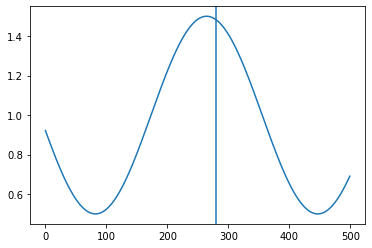

In [79]:
freq  = 2*np.pi/365.25
phase = 0.55*np.pi 

x = np.linspace(0, 500, 500)
season_cos = lambda x: 1 + 0.5*np.cos( freq*x + phase )

plt.plot(season_cos(x))
plt.axvline(x = 280)

In [80]:
households_chikwawa.to_csv('Data/Input/Join/households_chikwawa.csv', index=False)
individuals_chikwawa.to_csv('Data/Input/Join/individuals_chikwawa.csv', index=False)
individuals_time_series_chikwawa.to_csv('Data/Input/Join/individuals_time_series_chikwawa.csv', index=False)


households_chileka.to_csv('Data/Input/Join/households_chileka.csv', index=False)
individuals_chileka.to_csv('Data/Input/Join/individuals_chileka.csv', index=False)
individuals_time_series_chileka.to_csv('Data/Input/Join/individuals_time_series_chileka.csv', index=False)

households_ndirande.to_csv('Data/Input/Join/households_ndirande.csv', index=False)
individuals_ndirande.to_csv('Data/Input/Join/individuals_ndirande.csv', index=False)
individuals_time_series_ndirande.to_csv('Data/Input/Join/individuals_time_series_ndirande.csv', index=False)

# Output

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

households_chikwawa              = pd.read_csv (r'Data/Input/Join/households_chikwawa.csv')
individuals_chikwawa             = pd.read_csv (r'Data/Input/Join/individuals_chikwawa.csv')
individuals_time_series_chikwawa = pd.read_csv (r'Data/Input/Join/individuals_time_series_chikwawa.csv')


households_chileka              = pd.read_csv (r'Data/Input/Join/households_chileka.csv')
individuals_chileka             = pd.read_csv (r'Data/Input/Join/individuals_chileka.csv')
individuals_time_series_chileka = pd.read_csv (r'Data/Input/Join/individuals_time_series_chileka.csv')


households_ndirande              = pd.read_csv (r'Data/Input/Join/households_ndirande.csv')
individuals_ndirande             = pd.read_csv (r'Data/Input/Join/individuals_ndirande.csv')
individuals_time_series_ndirande = pd.read_csv (r'Data/Input/Join/individuals_time_series_ndirande.csv')

In [82]:
households_income_chikwawa = households_chikwawa[["house_number", "hh_income"]]
households_income_chikwawa.insert(2, "hh_income_log", np.log(households_income_chikwawa["hh_income"]), True)
households_income_chikwawa = households_income_chikwawa.drop("hh_income", axis = 1)

individuals_chikwawa = individuals_chikwawa.join(households_income_chikwawa.set_index('house_number'), on = "house_number")


households_income_chileka = households_chileka[["house_number", "hh_income"]]
households_income_chileka.insert(2, "hh_income_log", np.log(households_income_chileka["hh_income"]), True)
households_income_chileka = households_income_chileka.drop("hh_income", axis = 1)

individuals_chileka = individuals_chileka.join(households_income_chileka.set_index('house_number'), on = "house_number")


households_income_ndirande = households_ndirande[["house_number", "hh_income"]]
households_income_ndirande.insert(2, "hh_income_log", np.log(households_income_ndirande["hh_income"]), True)
households_income_ndirande = households_income_ndirande.drop("hh_income", axis = 1)

individuals_ndirande = individuals_ndirande.join(households_income_ndirande.set_index('house_number'), on = "house_number")

# Individual covariates and location

In [83]:
individuals_chikwawa.ip_sex = pd.Categorical(individuals_chikwawa.ip_sex)
individuals_chikwawa.insert(2, "ip_sex_cat", individuals_chikwawa.ip_sex.cat.codes, True)
individuals_chikwawa = individuals_chikwawa.drop("ip_sex", axis = 1)

individuals_chikwawa.ip_sex_cat    = individuals_chikwawa.ip_sex_cat.astype(float)
individuals_chikwawa.age           = individuals_chikwawa.age.astype(float)
individuals_chikwawa.hh_income_std = individuals_chikwawa.hh_income_log.astype(float)


individuals_chileka.ip_sex = pd.Categorical(individuals_chileka.ip_sex)
individuals_chileka.insert(2, "ip_sex_cat", individuals_chileka.ip_sex.cat.codes, True)
individuals_chileka = individuals_chileka.drop("ip_sex", axis = 1)

individuals_chileka.ip_sex_cat    = individuals_chileka.ip_sex_cat.astype(float)
individuals_chileka.age           = individuals_chileka.age.astype(float)
individuals_chileka.hh_income_std = individuals_chileka.hh_income_log.astype(float)


individuals_ndirande.ip_sex = pd.Categorical(individuals_ndirande.ip_sex)
individuals_ndirande.insert(2, "ip_sex_cat", individuals_ndirande.ip_sex.cat.codes, True)
individuals_ndirande = individuals_ndirande.drop("ip_sex", axis = 1)

individuals_ndirande.ip_sex_cat    = individuals_ndirande.ip_sex_cat.astype(float)
individuals_ndirande.age           = individuals_ndirande.age.astype(float)
individuals_ndirande.hh_income_std = individuals_ndirande.hh_income_log.astype(float)

<ipython-input-83-95fc45b7d231>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  individuals_chikwawa.hh_income_std = individuals_chikwawa.hh_income_log.astype(float)
<ipython-input-83-95fc45b7d231>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  individuals_chileka.hh_income_std = individuals_chileka.hh_income_log.astype(float)
<ipython-input-83-95fc45b7d231>:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  individuals_ndirande.hh_income_std = individuals_ndirande.hh_income_log.astype(float)


In [84]:
house_index_chikwawa      = individuals_chikwawa[["house_number"]].to_numpy()
individual_index_chikwawa = individuals_chikwawa[["individual_number"]].to_numpy()

loc_H_I_index_chikwawa = np.concatenate((house_index_chikwawa, individual_index_chikwawa), axis = 1)
individuals_covariates_chikwawa = individuals_chikwawa[["age", "ip_sex_cat", "hh_income_log"]].to_numpy()
n_individuals_chikwawa = max(individuals_chikwawa.individual_number)+1
n_households_chikwawa = max(individuals_chikwawa.house_number)+1
households_longitude_chikwawa = households_chikwawa.longitude.to_numpy()
households_latitude_chikwawa  = households_chikwawa.latitude.to_numpy()


house_index_chileka      = individuals_chileka[["house_number"]].to_numpy()
individual_index_chileka = individuals_chileka[["individual_number"]].to_numpy()

loc_H_I_index_chileka = np.concatenate((house_index_chileka, individual_index_chileka), axis = 1)
individuals_covariates_chileka = individuals_chileka[["age", "ip_sex_cat", "hh_income_log"]].to_numpy()
n_individuals_chileka = max(individuals_chileka.individual_number)+1
n_households_chileka = max(individuals_chileka.house_number)+1
households_longitude_chileka = households_chileka.longitude.to_numpy()
households_latitude_chileka  = households_chileka.latitude.to_numpy()


house_index_ndirande      = individuals_ndirande[["house_number"]].to_numpy()
individual_index_ndirande = individuals_ndirande[["individual_number"]].to_numpy()

loc_H_I_index_ndirande = np.concatenate((house_index_ndirande, individual_index_ndirande), axis = 1)
individuals_covariates_ndirande = individuals_ndirande[["age", "ip_sex_cat", "hh_income_log"]].to_numpy()
n_individuals_ndirande = max(individuals_ndirande.individual_number)+1
n_households_ndirande = max(individuals_ndirande.house_number)+1
households_longitude_ndirande = households_ndirande.longitude.to_numpy()
households_latitude_ndirande  = households_ndirande.latitude.to_numpy()

In [85]:
np.save("Data/Output/n_individuals_chikwawa.npy", (n_individuals_chikwawa))
np.save("Data/Output/n_households_chikwawa.npy", (n_households_chikwawa))
np.save("Data/Output/households_longitude_chikwawa.npy", (households_longitude_chikwawa))
np.save("Data/Output/households_latitude_chikwawa.npy", (households_latitude_chikwawa))
np.save("Data/Output/loc_H_I_index_chikwawa.npy", (loc_H_I_index_chikwawa))
np.save("Data/Output/individuals_covariates_chikwawa.npy", ((individuals_covariates_chikwawa-np.mean(individuals_covariates_chikwawa, axis = 0))/np.std(individuals_covariates_chikwawa, axis = 0)))


np.save("Data/Output/n_individuals_chileka.npy", (n_individuals_chileka))
np.save("Data/Output/n_households_chileka.npy", (n_households_chileka))
np.save("Data/Output/households_longitude_chileka.npy", (households_longitude_chileka))
np.save("Data/Output/households_latitude_chileka.npy", (households_latitude_chileka))
np.save("Data/Output/loc_H_I_index_chileka.npy", (loc_H_I_index_chileka))
np.save("Data/Output/individuals_covariates_chileka.npy", ((individuals_covariates_chileka-np.mean(individuals_covariates_chileka, axis = 0))/np.std(individuals_covariates_chileka, axis = 0)))


np.save("Data/Output/n_individuals_ndirande.npy", (n_individuals_ndirande))
np.save("Data/Output/n_households_ndirande.npy", (n_households_ndirande))
np.save("Data/Output/households_longitude_ndirande.npy", (households_longitude_ndirande))
np.save("Data/Output/households_latitude_ndirande.npy", (households_latitude_ndirande))
np.save("Data/Output/loc_H_I_index_ndirande.npy", (loc_H_I_index_ndirande))
np.save("Data/Output/individuals_covariates_ndirande.npy", ((individuals_covariates_ndirande-np.mean(individuals_covariates_ndirande, axis = 0))/np.std(individuals_covariates_ndirande, axis = 0)))

In [86]:
min_t = min([min(individuals_time_series_chikwawa.t), min(individuals_time_series_chileka.t), min(individuals_time_series_ndirande.t)])
max_t = max([max(individuals_time_series_chikwawa.t), max(individuals_time_series_chileka.t), max(individuals_time_series_ndirande.t)]) +1

N_I_detected_chikwawa = max(individuals_time_series_chikwawa.individual_number)+1

Y_ecoli_chikwawa = np.zeros((N_I_detected_chikwawa, max_t))+np.nan
Y_kpneu_chikwawa = np.zeros((N_I_detected_chikwawa, max_t))+np.nan

for index, row in individuals_time_series_chikwawa.iterrows():
    
    Y_ecoli_chikwawa[row.individual_number, row.t] = row.ecoli 
    Y_kpneu_chikwawa[row.individual_number, row.t] = row.kpneu 
    

N_I_detected_chileka = max(individuals_time_series_chileka.individual_number)+1

Y_ecoli_chileka = np.zeros((N_I_detected_chileka, max_t))+np.nan
Y_kpneu_chileka = np.zeros((N_I_detected_chileka, max_t))+np.nan

for index, row in individuals_time_series_chileka.iterrows():
    
    Y_ecoli_chileka[row.individual_number, row.t] = row.ecoli 
    Y_kpneu_chileka[row.individual_number, row.t] = row.kpneu 
    

N_I_detected_ndirande = max(individuals_time_series_ndirande.individual_number)+1

Y_ecoli_ndirande = np.zeros((N_I_detected_ndirande, max_t))+np.nan
Y_kpneu_ndirande = np.zeros((N_I_detected_ndirande, max_t))+np.nan

for index, row in individuals_time_series_ndirande.iterrows():
    
    Y_ecoli_ndirande[row.individual_number, row.t] = row.ecoli 
    Y_kpneu_ndirande[row.individual_number, row.t] = row.kpneu 

In [ ]:
np.save("Data/Output/Y_ecoli_chikwawa.npy", (Y_ecoli_chikwawa))
np.save("Data/Output/Y_kpneu_chikwawa.npy", (Y_kpneu_chikwawa))


np.save("Data/Output/Y_ecoli_chileka.npy", (Y_ecoli_chileka))
np.save("Data/Output/Y_kpneu_chileka.npy", (Y_kpneu_chileka))


np.save("Data/Output/Y_ecoli_ndirande.npy", (Y_ecoli_ndirande))
np.save("Data/Output/Y_kpneu_ndirande.npy", (Y_kpneu_ndirande))

In [49]:
sparsity = np.load("Data/Output/Y_ecoli_chikwawa.npy")

In [55]:
when = np.nansum(sparsity, axis = 0)

In [56]:
len(when)

515

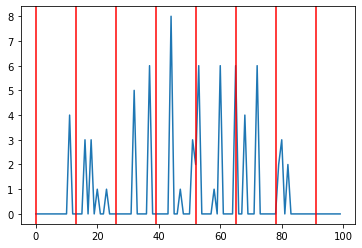

In [64]:
plt.plot(when[250:350])
        
for i in range(0, len(when[250:350])):
    if i%13==0:
        plt.axvline(x = i, ymin = 0, ymax = 8, color = "red")